### Task 6.4
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### Importing Libraries

In [3]:
import pandas as pd
import numpy asa np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
#Create path
path =r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data'

In [6]:
#Import data
df=pd.read_csv(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\mortalityrate.csv',index_col=False)

### Data Cleaning

In [7]:
df.shape

(9487, 11)

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

State                       0
State Code                  0
Race                        0
Ten-Year Age Groups         0
Ten-Year Age Groups Code    0
Year                        0
Gender                      0
Gender Code                 0
Deaths                      0
Population                  0
Death Proportion            0
dtype: int64

In [9]:
#Check for duplicates

dups = df.duplicated()

In [10]:
dups.shape # No dups

(9487,)

C:\Users\manny\AppData\Local\Temp\ipykernel_7512\2043926609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Deaths'], bins=25) # No extreme values


<Axes: xlabel='Deaths', ylabel='Density'>

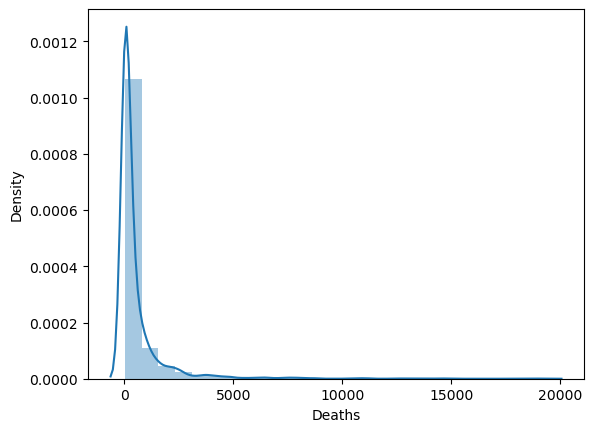

In [12]:
#Extreme Values check
sns.distplot(df['Deaths'], bins=25) # No extreme values

In [14]:
# Check the mean
df['Deaths'].mean() 

546.1814061347106

In [15]:
# Check the median
df['Deaths'].median() 

93.0

In [17]:
 # Check the max
df['Deaths'].max()

19407

In [18]:
 # Check the min
df['Deaths'].min()

10

### Data prep for regression analysis

#### Hypothesis: The incidence of deaths caused by circulatory system diseases has increased significantly over the past 5 years

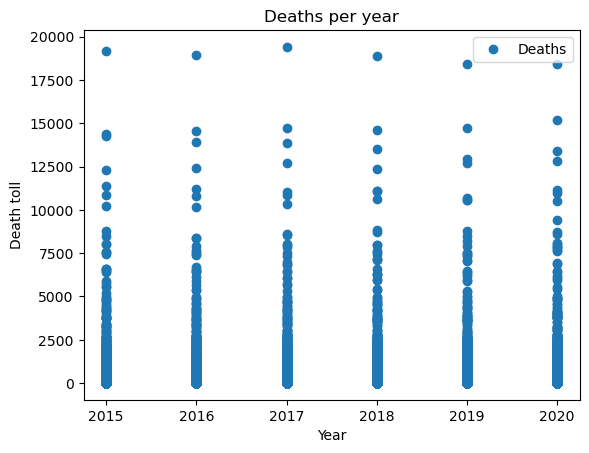

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Deaths per year')  
plt.xlabel('Year')  
plt.ylabel('Death toll')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Deaths'].values.reshape(-1,1)

In [28]:
X

array([[2017],
       [2017],
       [2020],
       ...,
       [2019],
       [2020],
       [2020]], dtype=int64)

In [29]:
y

array([[ 10],
       [ 10],
       [ 13],
       ...,
       [206],
       [269],
       [199]], dtype=int64)

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

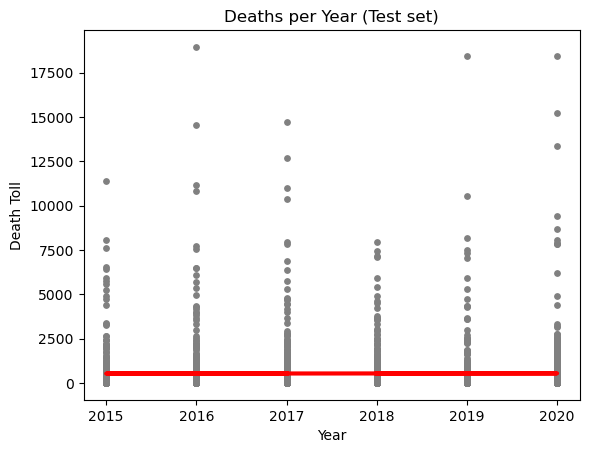

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Deaths per Year (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Death Toll')
plot_test.show()

#### The line does not fit the data very well.  This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.53887054]]
Mean squared error:  2003810.939440192
R2 score:  -5.555242991173159e-06


In [38]:
y_predicted

array([[543.91335233],
       [546.45222287],
       [548.99109341],
       ...,
       [546.45222287],
       [543.91335233],
       [541.37448179]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1807,543.913352
1,843,546.452223
2,45,548.991093
3,76,548.991093
4,1210,538.835611
5,996,548.991093
6,25,546.452223
7,67,546.452223
8,38,536.296741
9,45,536.296741


#### The summary statistics of the model confirm that the model is inaccurate.  Which can also be seen by the variance in the actual vs prdicted values.  An R2 score of-5.555242991173159e-06 indicates a very poor fit and the large MSE also confirms this.  The slope of 2.53887054 shows that as retail price increases sale price drops.

### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.53887054]]
Mean squared error:  1696670.8024230897
R2 score:  1.1209462292383066e-05


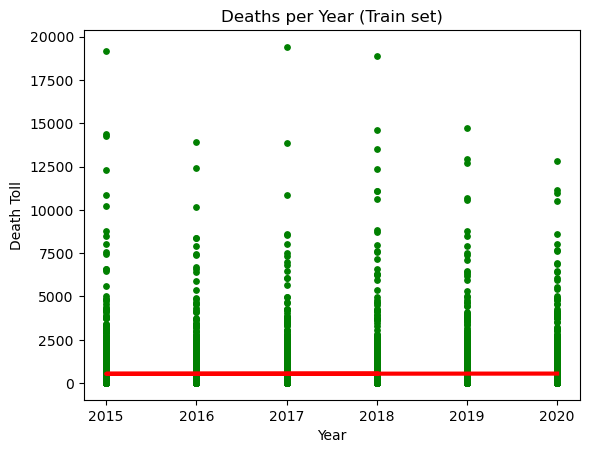

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Deaths per Year (Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Death Toll')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set. 